In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
data1 = np.loadtxt('ex2data1.txt', delimiter=',', usecols=(0,1,2), unpack=True)

X = np.transpose(np.array(data1[:-1]))
Y = np.transpose(np.array(data1[-1:]))

# samples
m = Y.size

X = np.insert(X, 0, 1, axis=1)

print (X, '\n Y: \n', Y)


[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]
 [ 1.         45.08327748 56.31637178]
 [ 1.         61.10666454 96.51142588]
 [ 1.         75.02474557 46.55401354]
 [ 1.         76.0987867  87.42056972]
 [ 1.         84.43281996 43.53339331]
 [ 1.         95.86155507 38.22527806]
 [ 1.         75.01365839 30.60326323]
 [ 1.         82.30705337 76.4819633 ]
 [ 1.         69.36458876 97.71869196]
 [ 1.         39.53833914 76.03681085]
 [ 1.         53.97105215 89.20735014]
 [ 1.         69.07014406 52.74046973]
 [ 1.         67.94685548 46.67857411]
 [ 1.         70.66150955 92.92713789]
 [ 1.         76.97878373 47.57596365]
 [ 1.         67.37202755 42.83843832]
 [ 1.         89.67677575 65.79936593]
 [ 1.         50.53478829 48.85581153]
 [ 1.         34.21206098 44.2095286 ]
 [ 1.         77.92409145 68.97235999]
 [ 1.         62.27101367

In [6]:
# visualize the data
# divide the sample into two: y=1 or y=0
# 1. ones with positive classification
# 2. ones with null classification
pos = np.array([X[i] for i in range(X.shape[0]) if Y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if Y[i] == 0])


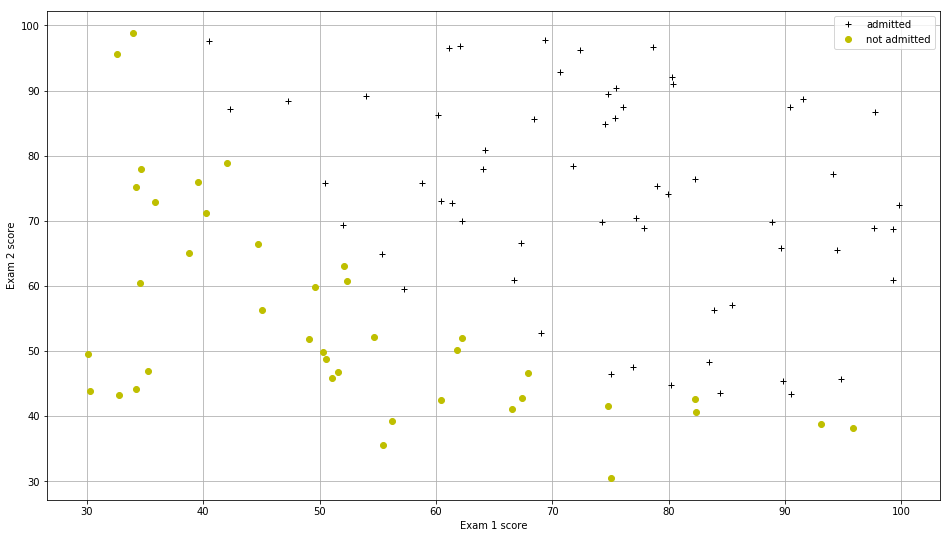

In [7]:
def plotData():
    plt.figure(figsize=(16,9))
    plt.plot(pos[:,1], pos[:,2], 'k+', label='admitted')
    plt.plot(neg[:,1], neg[:,2], 'yo', label='not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.grid(True)
    plt.legend()
    
plotData()    

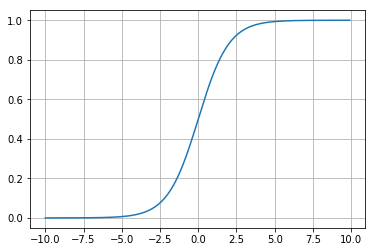

In [8]:
# implementation

from scipy.special import expit # sigmoid函数

x = np.arange(-10, 10, .1)
plt.plot(x, expit(x))
plt.grid(True)


In [9]:
# hypothesis function and cost function for logistic regression

# hø()
# def h(theta, x):
#     return expit(np.dot(x, theta))
def h(mytheta, myX): 
    return expit(np.dot(myX, mytheta))

# def computeCost(theta, X, Y, mylambda=0.):
#     term1 = np.dot(np.array(Y).T, np.log(h(theta, X))) # y=1
#     term2 = np.dot(1-np.array(Y).T, np.log(1 - h(theta, X)))
    
#     # regularization -> lambda * sum(øj)^2 j=[1,n] n=features
#     reg_term = (mylambda/2) * np.sum(np.dot(theta[1:].T, theta[1:]))
    
#     return float(-(1./m) * (np.sum(term1 + term2) + reg_term))

# cost function
def computeCost(mytheta, myX, myY, myLambda = 0.):

    term1 = np.dot(-np.array(myY).T, np.log(h(mytheta, myX)))
    term2 = np.dot(1-np.array(myY).T, np.log(1-h(mytheta, myX)))
    
    # 正则化 => lambda * sum(øj)^2
    regterm = (myLambda/2) * np.sum(np.dot(mytheta[1:].T, mytheta[1:])) # skip ø0
    
    return float((1./m) * (np.sum(term1- term2) + regterm))


In [10]:
initial_theta = np.zeros((X.shape[1], 1))
computeCost(initial_theta, X, Y)

0.6931471805599453

In [11]:
# optimize theta with optimize.fmin instead of gradient descent 优化ø
# and return optimal theta vector and mincost
from scipy import optimize

def optimizeTheta(theta, X, Y, mylambda=0.):
    result = optimize.fmin(computeCost, x0=theta, args=(X, Y, mylambda), maxiter=400, full_output=True)
    
    return result[0], result[1] # theta, mincost


In [12]:
theta, mincost = optimizeTheta(initial_theta, X, Y)
print (mincost)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
0.2034977015902151


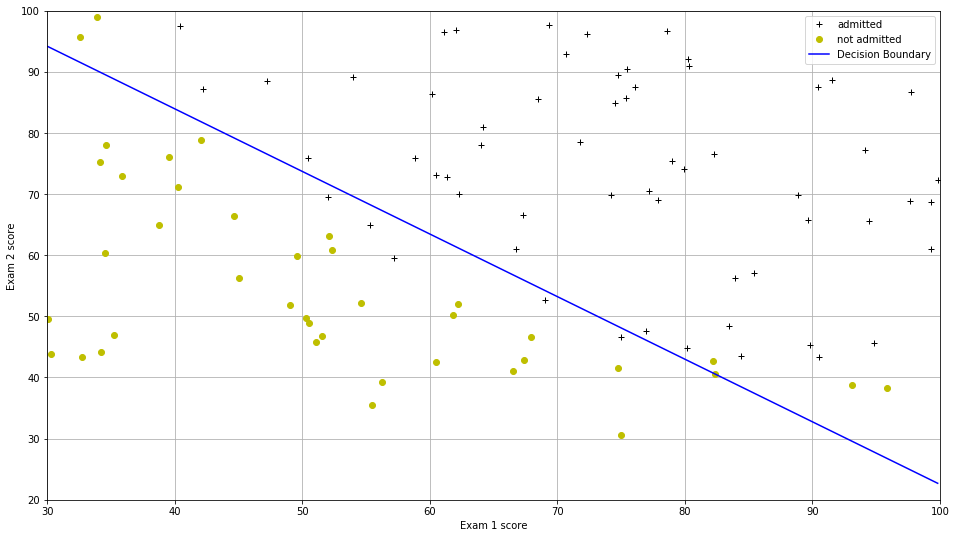

In [13]:
# plot the decision boundary: two types of points and a line between them
# line model:y = mx + b is replaced by x2 = (-1/ø2)(ø0 + ø1*x1)

# 取出所有点中x1轴的最大值，以及其在x2 = (-1/ø2)(ø0 + ø1*x1)模型中，对应的x2
# 获得最优值的ø，绘制成line

# 取出x1轴上，最大最小值
boundary_xs = np.array([np.min(X[:,1]), np.max(X[:, 1])])
# 取出x2轴上，x1轴上最大和最小的值对应的值 由line model 可得 x2 = (-1/ø2)(ø0 + ø1*x1)
boundary_ys = (-1./theta[2])*(theta[0] + theta[1]*boundary_xs)

plotData()
plt.plot(boundary_xs, boundary_ys, 'b-', label='Decision Boundary')
plt.xlim(30, 100)
plt.ylim(20, 100)
plt.legend()


In [14]:
# make prediction
def makePrediction(theta, X):
    return h(theta, X) >= 0.5

# compute the percentage of samples I got correct:
pos_correct = float(np.sum(makePrediction(theta, pos)))
neg_correct = float(np.sum(np.invert(makePrediction(theta, neg))))

total = len(pos) + len(neg)
prcnt_correct = float(pos_correct + neg_correct) / total

print ('accuracy:', prcnt_correct)

accuracy: 0.89


In [15]:
# regularized logistic regression

data2 = np.loadtxt('ex2data2.txt', delimiter=',', usecols=(0,1,2), unpack=True)

X = np.transpose(data2[:-1])
Y = np.transpose(data2[-1:])

m = Y.size

X = np.insert(X, 0, 1, axis=1)


In [16]:
# divide the sample into two: y=1 or y=0
# 1. ones with positive classification
# 2. ones with null classification
pos = np.array([X[i] for i in range(X.shape[0]) if Y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if Y[i] == 0])

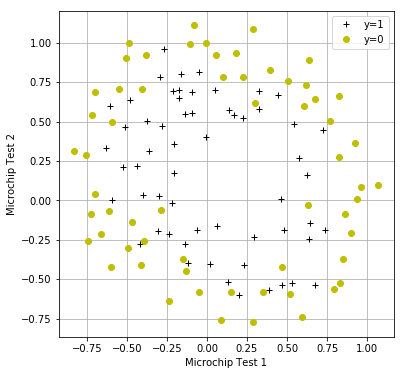

In [17]:
def plotData():
    plt.plot(pos[:,1],pos[:,2],'k+',label='y=1')
    plt.plot(neg[:,1],neg[:,2],'yo',label='y=0')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend()
    plt.grid(True)

#Draw it square to emphasize circular features
plt.figure(figsize=(6,6))
plotData()

In [18]:
# feature mapping
def featureMap(x1col, x2col):
    out = np.zeros((x1col.shape[0], 1))
    """
    为了获得这样的形式转换
    mapFeature(x) = [   1
                        x1
                        x2
                        x1^2
                        x1*x2
                        x2^2
                        x1^3
                        .
                        .
                        .
                        x1*x2^5
                        x2^6
                    ]
    A logistic regression classifier trained on this higher-dimension feature vector 
    will have a more complex decision boundary and will appear nonlinear 
    when drawn in our 2-dimensional plot                
    """
    for i in range(1, 7): # 1-6
        for j in range(0, i+1):
            term1 = x1col ** (i-j) # ** => 乘方
            term2 = x2col ** (j)
            term = (term1 * term2).reshape(term1.shape[0], 1)
            out = np.hstack((out, term))
            
    return out


In [19]:
mappedX = featureMap(X[:,1], X[:, 2])

# print (mappedX)

In [20]:
# cost function

initial_theta = np.zeros((mappedX.shape[1], 1))
computeCost(initial_theta, mappedX, Y)

0.6931471805599454

In [21]:
# noticed that fmin wasn't converging
# use minimize instead
""" optimize.fmin and optimize.minimize 可以替代传统的ø迭代的方式获得最优 """
def optimizeRegularizedTheta(mytheta, X, Y, myLambda=0.):
    # BFGS 一种拟牛顿法
    result = optimize.minimize(computeCost, mytheta, args=(X, Y, myLambda), method='BFGS', options={"maxiter":500, "disp":False})
#     print (result.fun)
    return np.array([result.x]), result.fun

# print (initial_theta.shape, mappedX.shape,Y.shape)
theta, mincost = optimizeRegularizedTheta(initial_theta, mappedX, Y)
print (mincost)


0.28390637679613434


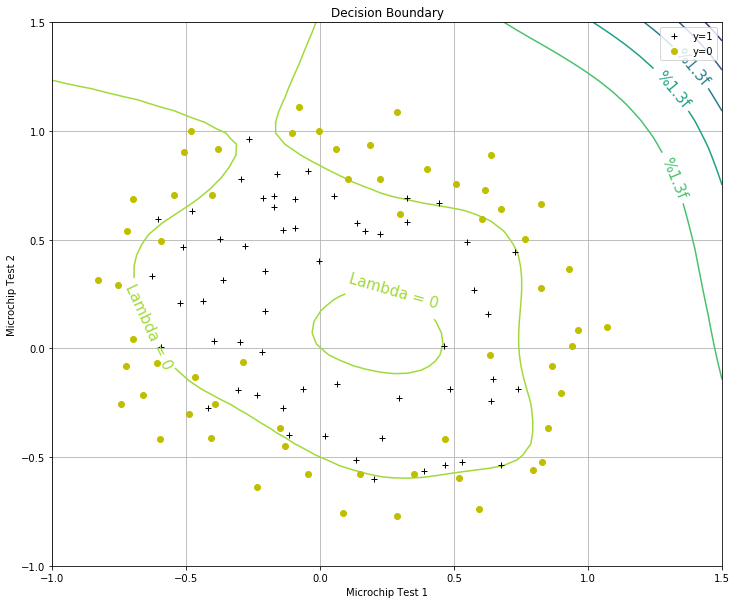

In [24]:
# plot boundary
def plotBoundary(myinitial_theta, myx, myy, myLambda=0.):
    
    # 计算出全局最优ø，以及对应的mincost -》 optimize.minimize
    theta, mincost = optimizeRegularizedTheta(myinitial_theta, myx, myy, myLambda)
    
    # 创建测试用随机对象（x，y，z） start
    xvals = np.linspace(-1, 1.5, 50) # return 一个数组
    yvals = np.linspace(-1, 1.5, 50)
    zvals = np.zeros((len(xvals), len(yvals)))
    
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = featureMap(np.array([xvals[i]]), np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta, myfeaturesij.T)
#             if (i<3 and j<2):
#                 print ('zvals: ', zvals[i][j], '\n')
                    
    zvals = np.transpose(zvals)
    # end
#     print (zvals)
    
    u, v = np.meshgrid(xvals, yvals)
    mycontour = plt.contour(xvals, yvals, zvals)
    
    myfmt = {0:'Lambda = %d' % myLambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")
    
# test
plt.figure(figsize=(12,10))
plotData()
plotBoundary(initial_theta, mappedX, Y)


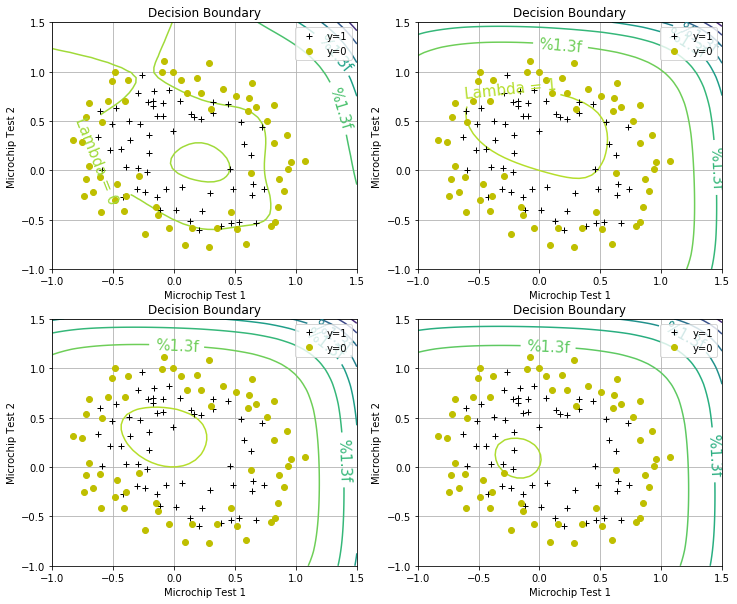

In [25]:

plt.figure(figsize=(12,10))

plt.subplot(221)
plotData()
plotBoundary(theta, mappedX, Y, 0.)

plt.subplot(222)
plotData()
plotBoundary(theta, mappedX, Y, 1.)

plt.subplot(223)
plotData()
plotBoundary(theta, mappedX, Y, 10.)

plt.subplot(224)
plotData()
plotBoundary(theta, mappedX, Y, 100.)

In [48]:
# feature mapping
def featureMap_test(x1col, x2col):
    out = np.zeros((x1col.shape[0], 1))
    degree = 3
    """
    为了获得这样的形式转换
    mapFeature(x) = [   1
                        x1
                        x2
                        x1^2
                        x1*x2
                        x2^2
                        x1^3
                        .
                        .
                        .
                        x1*x2^5
                        x2^6
                    ]
    A logistic regression classifier trained on this higher-dimension feature vector 
    will have a more complex decision boundary and will appear nonlinear 
    when drawn in our 2-dimensional plot                
    """
    for i in range(1, degree + 1): # 1-6
        for j in range(0, i+1):
            term1 = x1col ** (i-j) # ** => 乘方
            term2 = x2col ** (j)
            term = (term1 * term2).reshape(term1.shape[0], 1)
#             print ('This is I:%d and J:%d'%(i,j), term)
            out = np.hstack((out, term))
            
    return out

a = np.array([[1,2], [3,4]])
mapped_test = featureMap_test(a[:, 0], a[:, 1]) 

# print (mapped_test)


In [66]:
xval_test = np.linspace(-1, 1.5, 50) # -1 - 1.5 分为50步
print (xval_test)

yval_test = np.linspace(-10, 10, 21)
print (yval_test)

xval_t2 = np.linspace(1,10,10)
yval_t2 = np.linspace(-5,-1,5)
u, v = np.meshgrid(xval_t2, yval_t2)
print (u, '\n', v) # u -> xvals, v -> yvals
print (xval_t2)

[-1.         -0.94897959 -0.89795918 -0.84693878 -0.79591837 -0.74489796
 -0.69387755 -0.64285714 -0.59183673 -0.54081633 -0.48979592 -0.43877551
 -0.3877551  -0.33673469 -0.28571429 -0.23469388 -0.18367347 -0.13265306
 -0.08163265 -0.03061224  0.02040816  0.07142857  0.12244898  0.17346939
  0.2244898   0.2755102   0.32653061  0.37755102  0.42857143  0.47959184
  0.53061224  0.58163265  0.63265306  0.68367347  0.73469388  0.78571429
  0.83673469  0.8877551   0.93877551  0.98979592  1.04081633  1.09183673
  1.14285714  1.19387755  1.24489796  1.29591837  1.34693878  1.39795918
  1.44897959  1.5       ]
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]
[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]] 
 [[-5. -5. -5. -5. -5. -5. -5. -5. -5. -5.]
 [-4. -4. -4. -4. -4.